# Title: Bank Marketing (with social/economic context)

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('bank-full.csv' ,sep=";", encoding='cp1252')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
#Checking for unique values in columns.
for i in df.columns:
    print(i,'\n')
    
    print(set(df[i].tolist()),'\n')

age 

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95} 

job 

{'unknown', 'management', 'blue-collar', 'unemployed', 'services', 'housemaid', 'student', 'technician', 'retired', 'admin.', 'entrepreneur', 'self-employed'} 

marital 

{'married', 'single', 'divorced'} 

education 

{'unknown', 'secondary', 'primary', 'tertiary'} 

default 

{'no', 'yes'} 

balance 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9

job,education,contact,poutcome have unknown as a value. Checking their count and dropping the variable if the count is very high.

In [9]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
288 / len(df['job'])*100

0.6370131162770122

In [11]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
1857 / len(df['education'])*100

4.1074074893278185

In [13]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
13020 / len(df['contact'])*100

28.798301298356595

In [15]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [16]:
36959 / len(df['poutcome']) *100

81.74780473778506

Even though we have 81% of the values as unknown not dropping poutcome as we dont know if they are missing values.

In [17]:
# Replacing -1 to 0 in pdays where 0 means client not contacted.

In [18]:
df['pdays'] = df['pdays'].replace(-1,0)

In [19]:
df[df['pdays'] == -1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In the previous variable a person has been contacted 275 times removing that from the dataset

In [20]:
df.loc[df['previous'] == 275]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [21]:
df = df.drop(index = 29182)

In [22]:
df.loc[df['previous'] == 275]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# EDA

In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000
mean,40.936231,1362.290179,15.806724,258.161071,2.763858,41.010307,0.574253
std,10.618879,3044.797065,8.322315,257.530306,3.098053,99.788306,1.907928
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


In [24]:
df['y'].value_counts()

no     39921
yes     5289
Name: y, dtype: int64

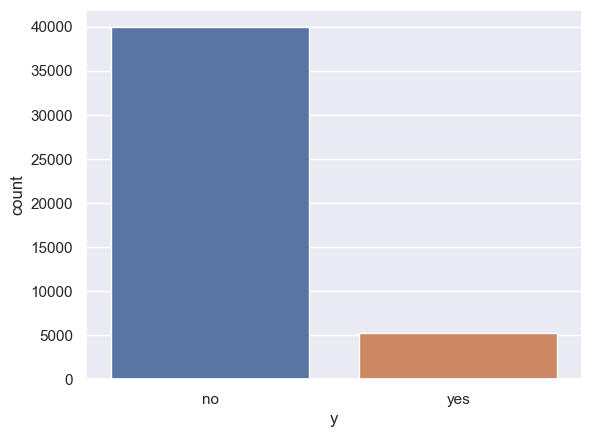

In [25]:
sns.countplot(df['y'])
plt.show()

We can clearly see from the above plot that we have an imbalanced dataset interms of the target variable.

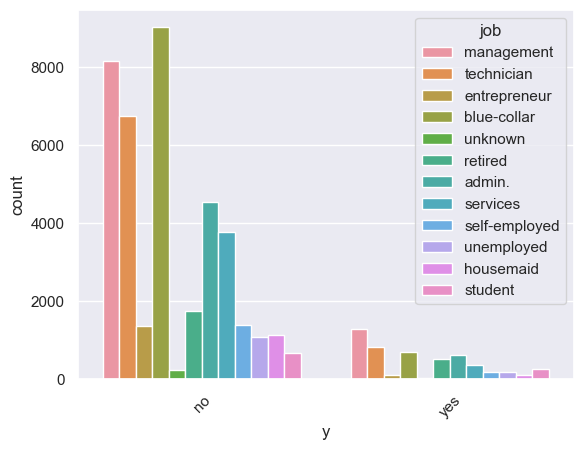

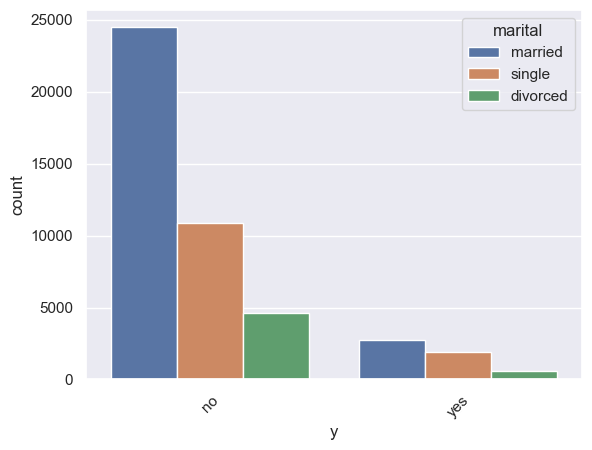

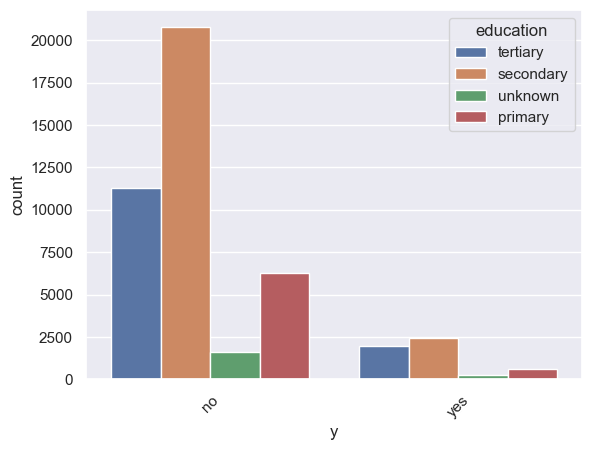

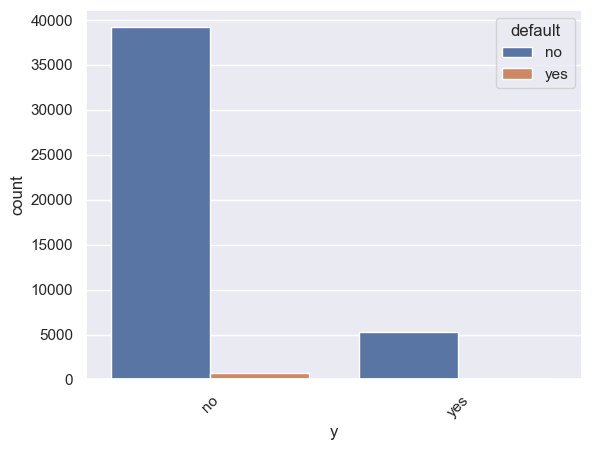

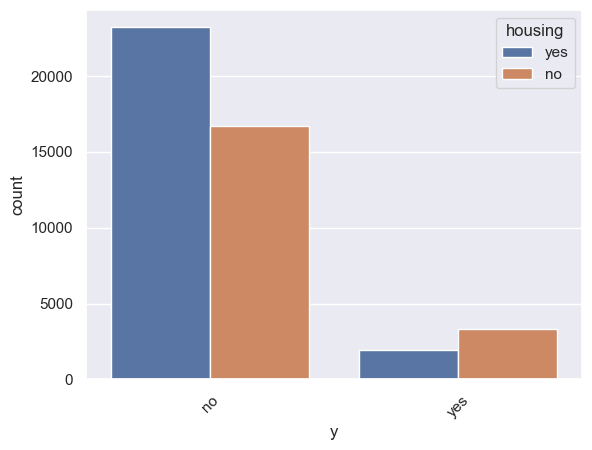

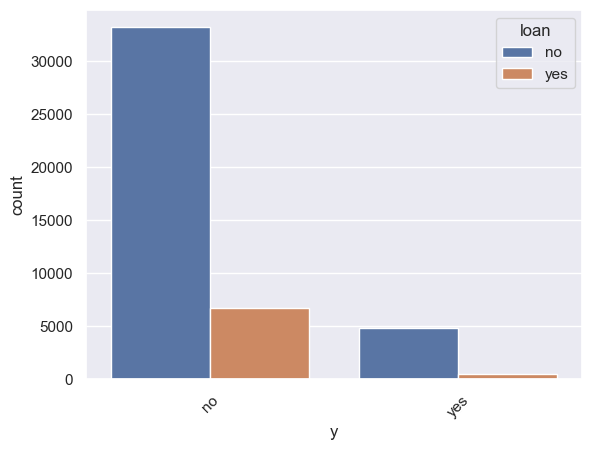

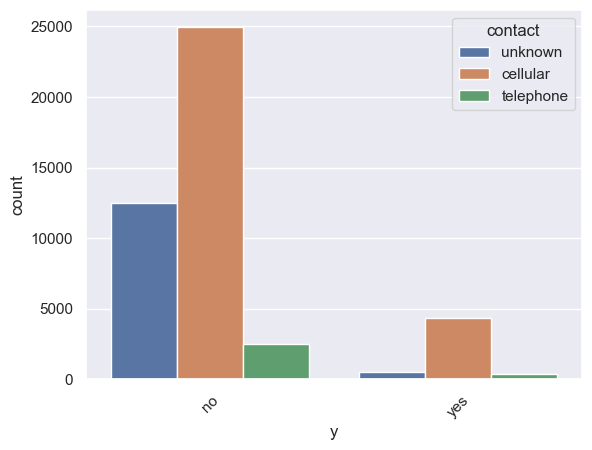

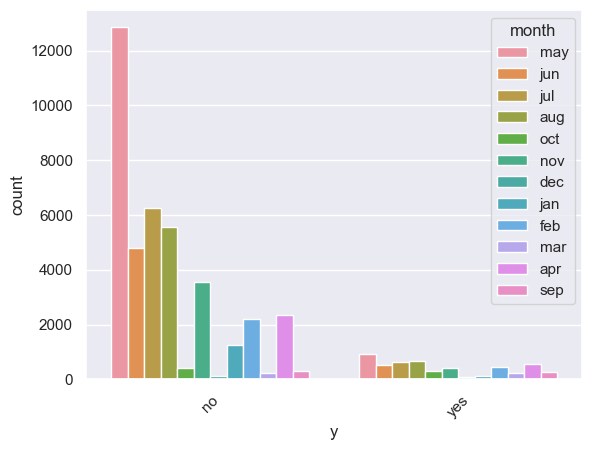

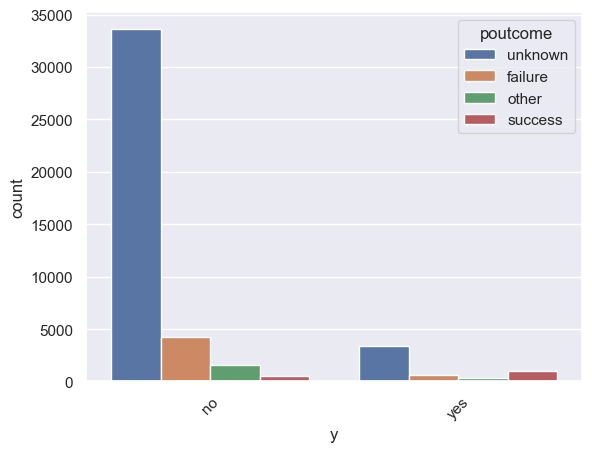

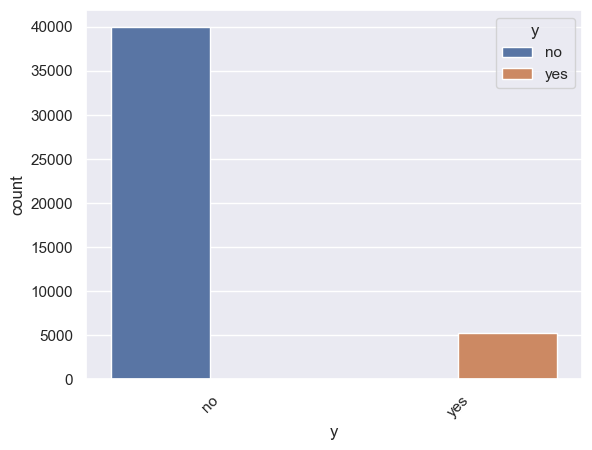

In [26]:
def countplot(col):
    sns.countplot(df['y'],hue = df[col])
    plt.xticks(rotation=45)
    plt.show()
    
for i in list(df.select_dtypes(include = 'object').columns):
    countplot(i)


The count of deposits by management, married, people with tertiary education, people with cellular is the highest.

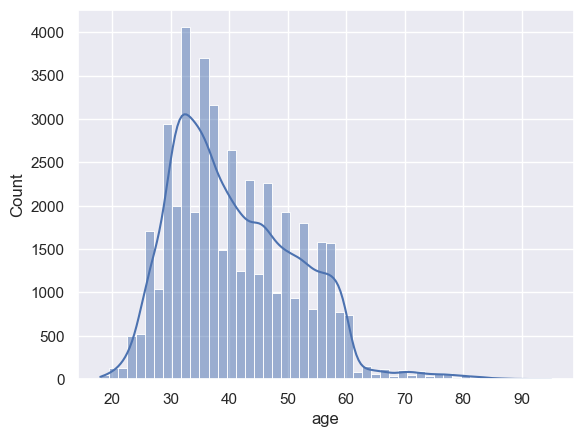

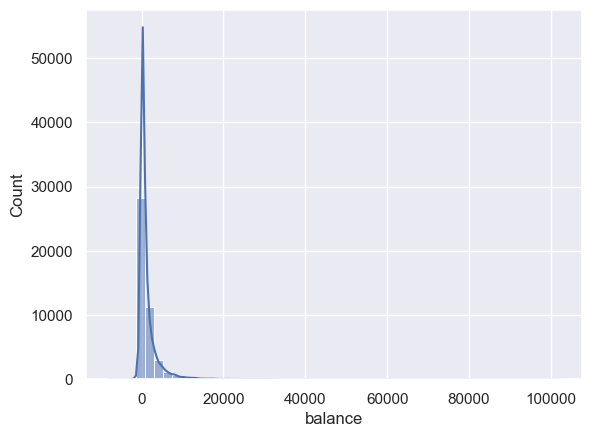

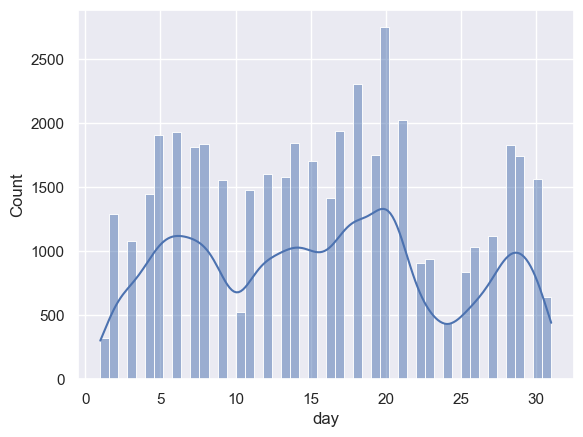

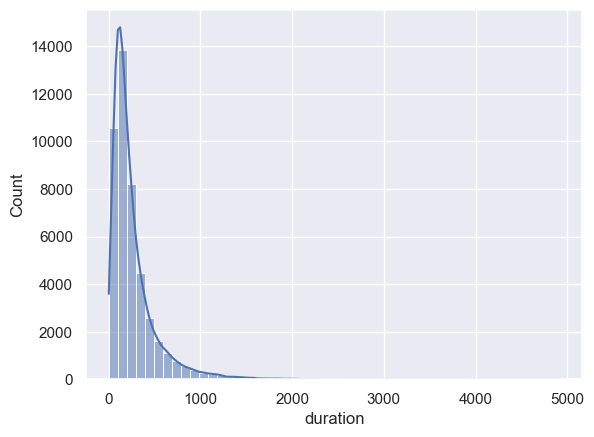

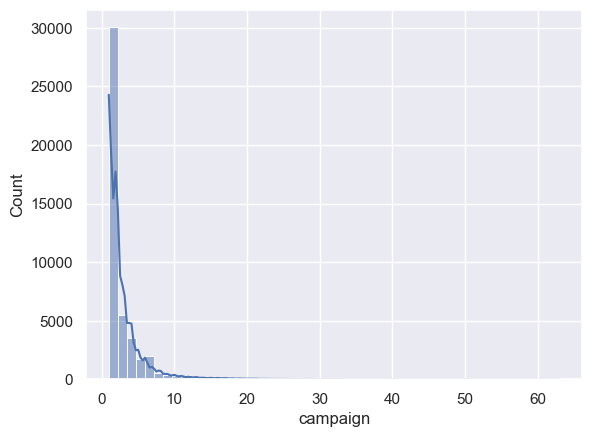

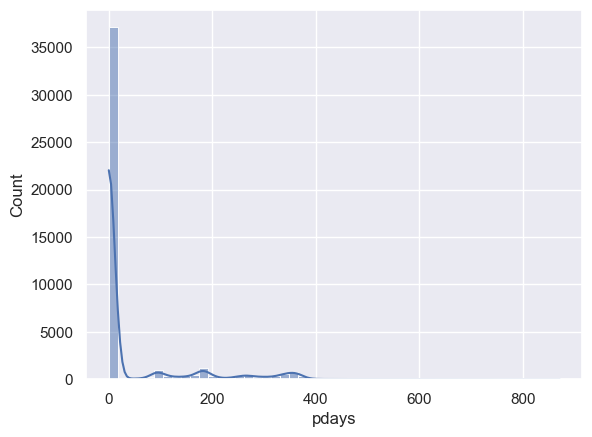

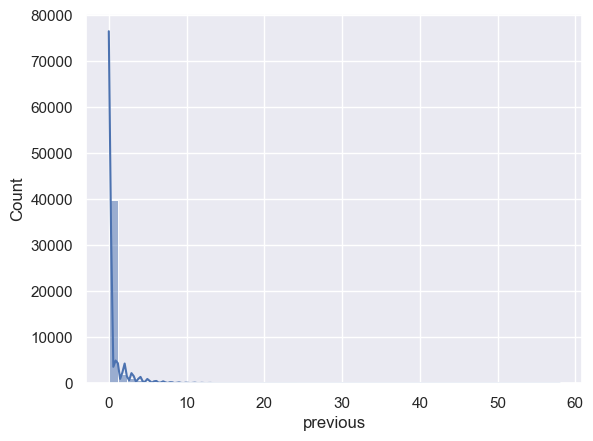

In [27]:
def histplot(col):
    sns.histplot(data = df, x = col, kde = True,bins = 50)
    
    plt.show()
    
numerical_cols = df.select_dtypes(exclude = 'object').columns    
    
for i in numerical_cols:
    histplot(i)

The distribution of balance, duation, pdays, previous, campaign seem to be right skewed.

<AxesSubplot:xlabel='age', ylabel='Count'>

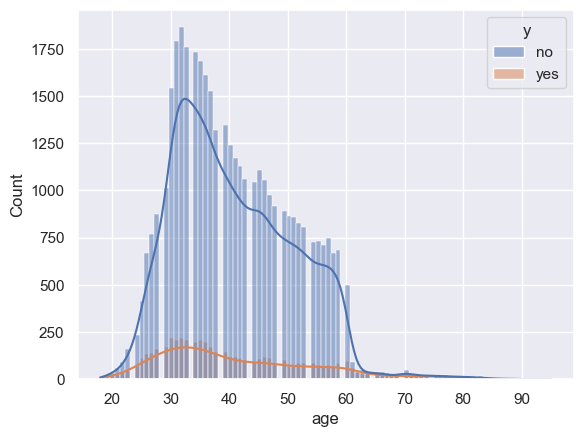

In [28]:
sns.histplot(x = 'age',hue = 'y',data = df, kde = True)

The maximum people who have deposited are of the age between 30 and 35.

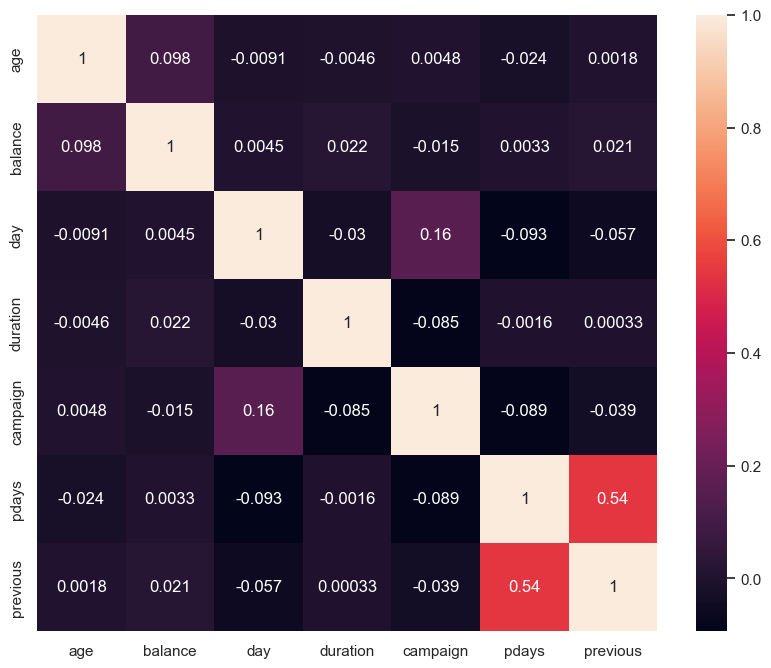

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

None of the variables seem to be highly correlated. There is +ve correlation between pdays and previous.

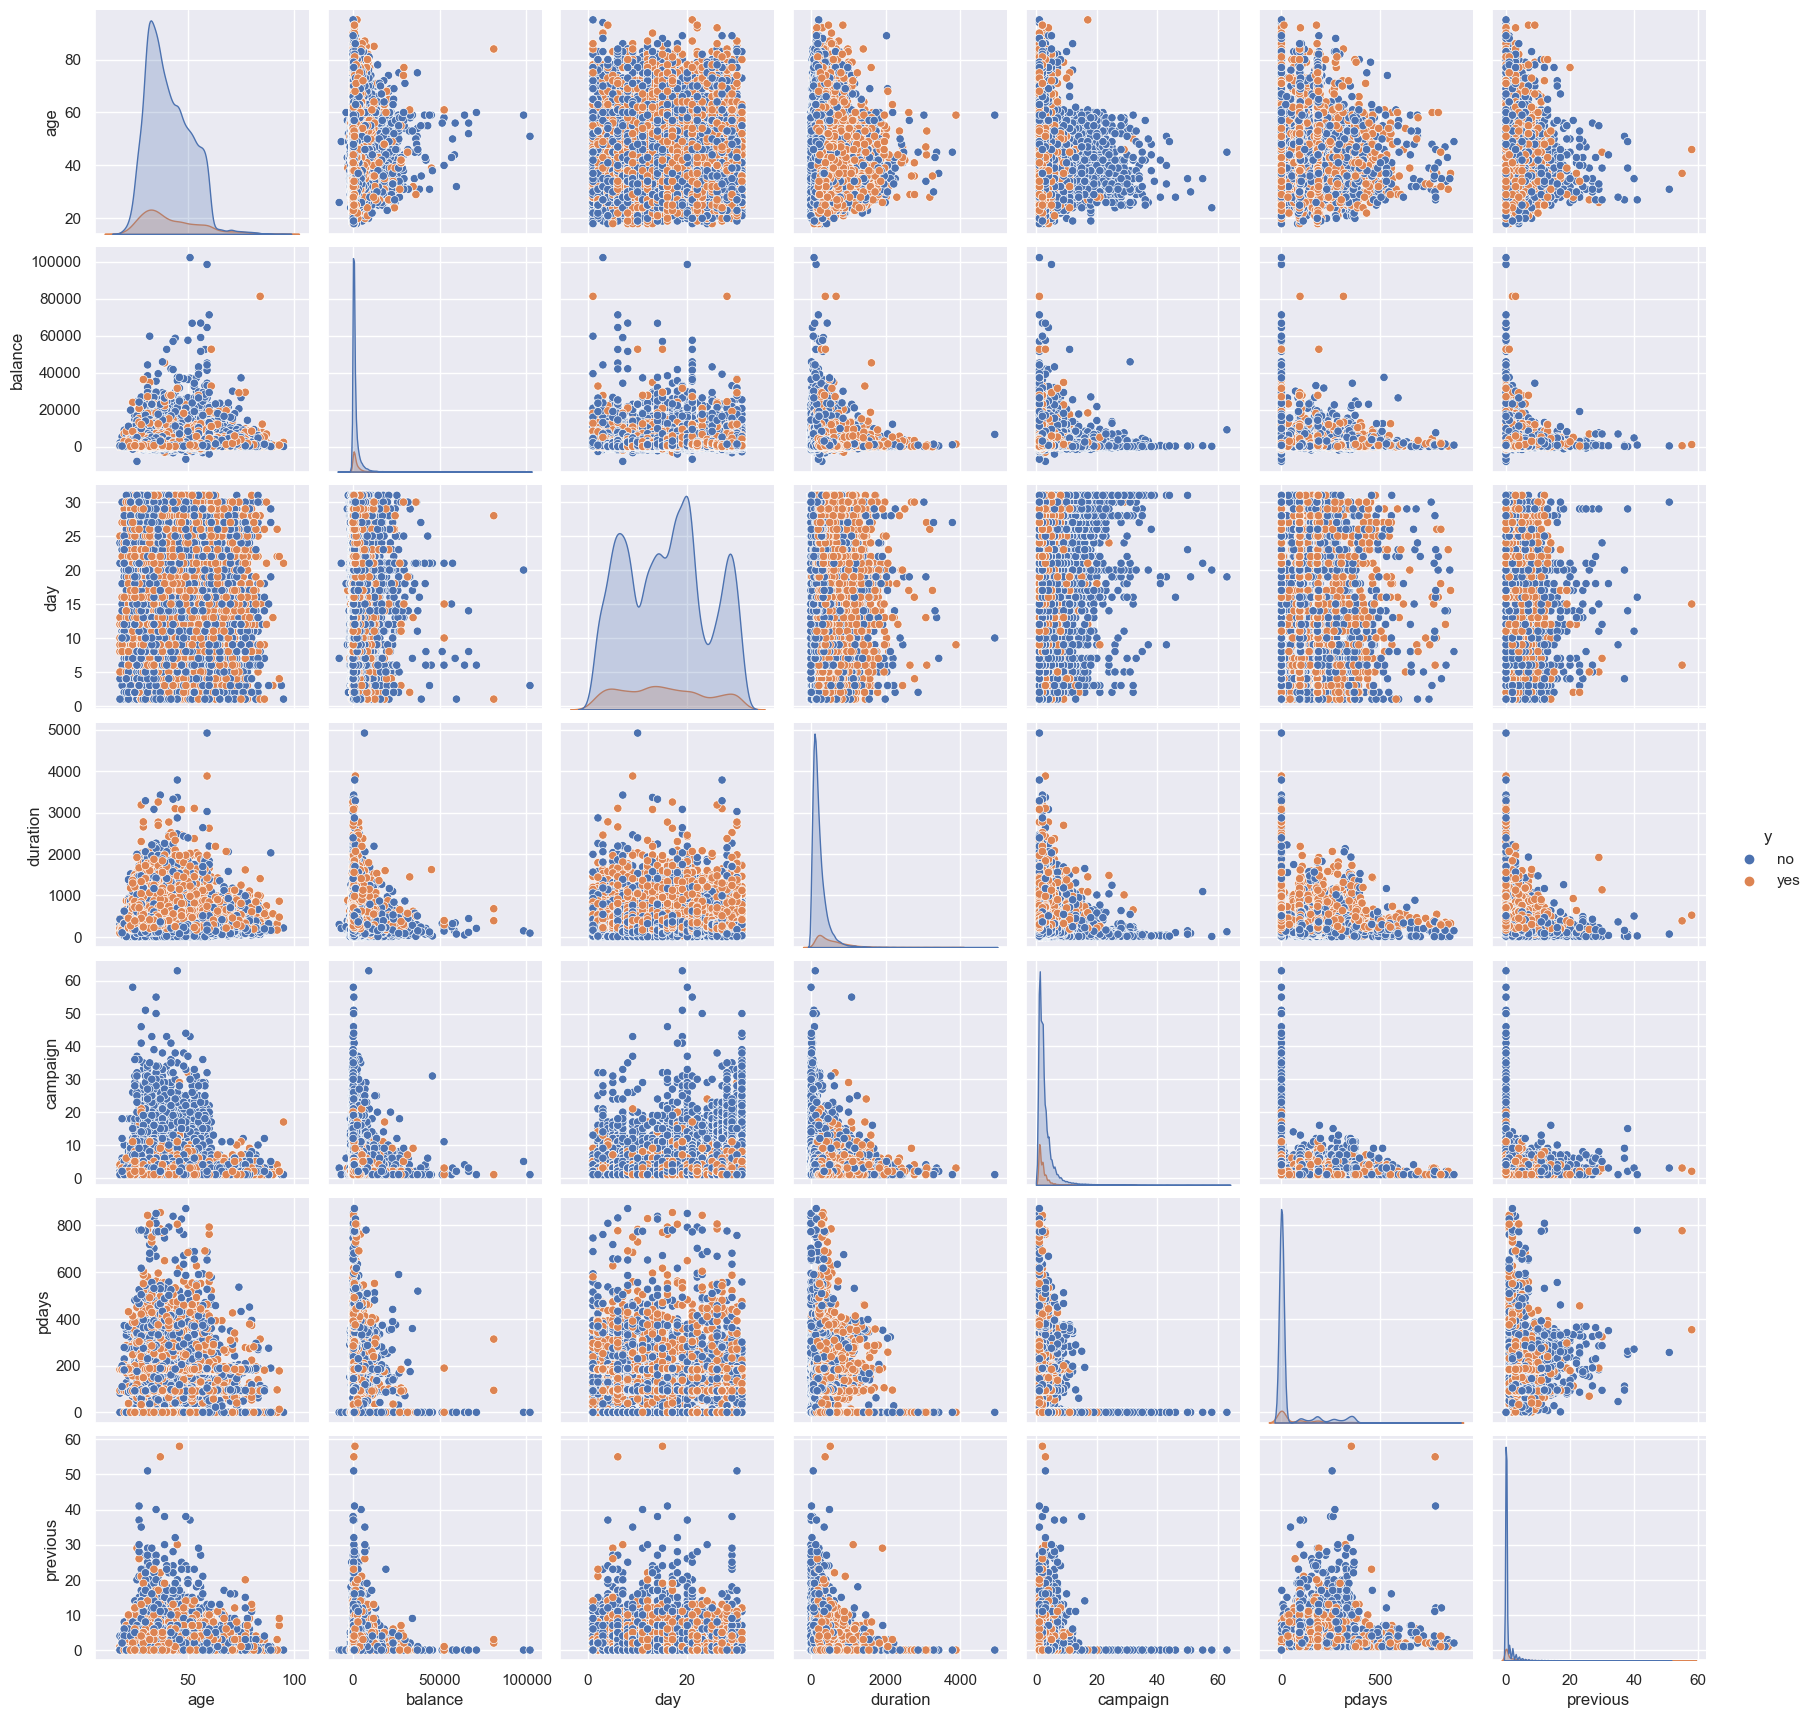

In [30]:
sns.pairplot(df,hue = 'y')
plt.show()

# Checking for Outliers

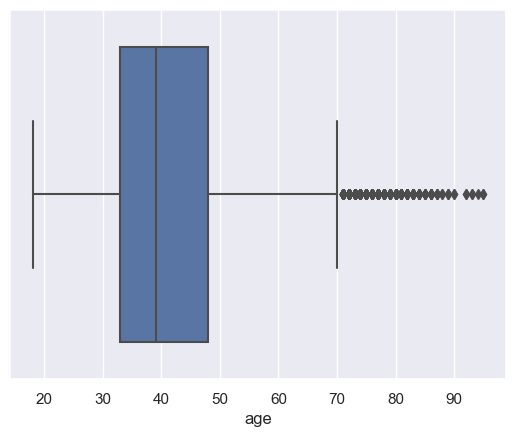

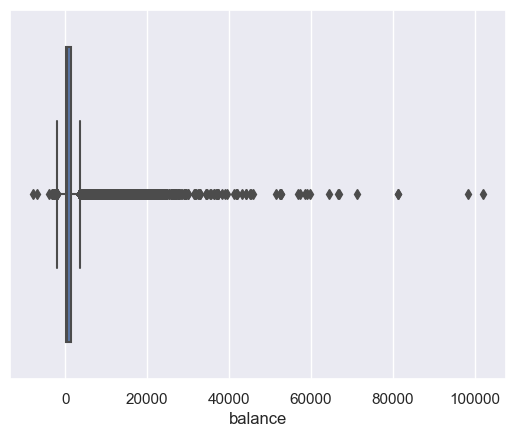

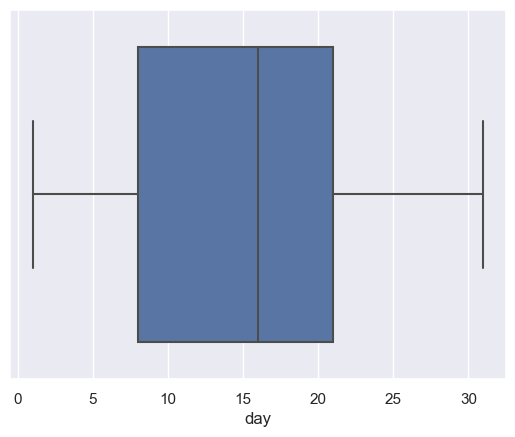

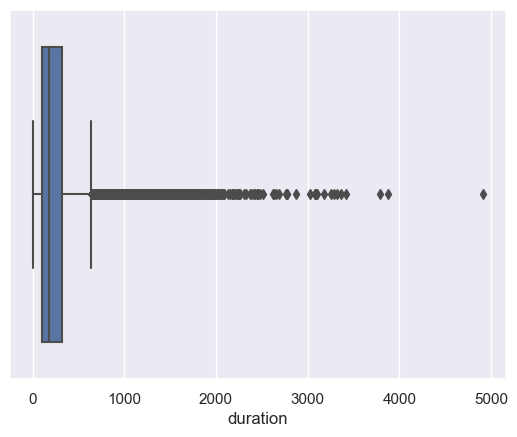

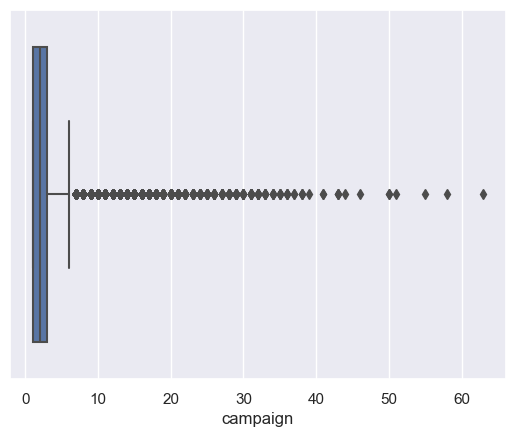

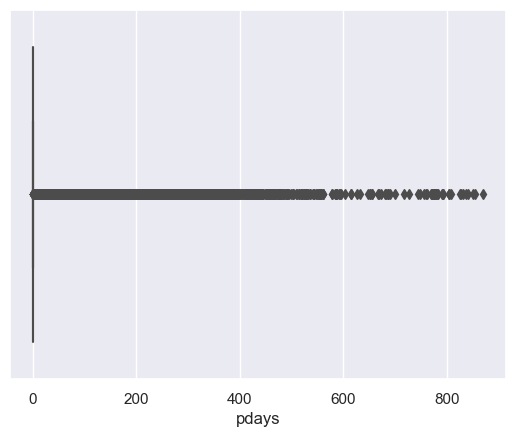

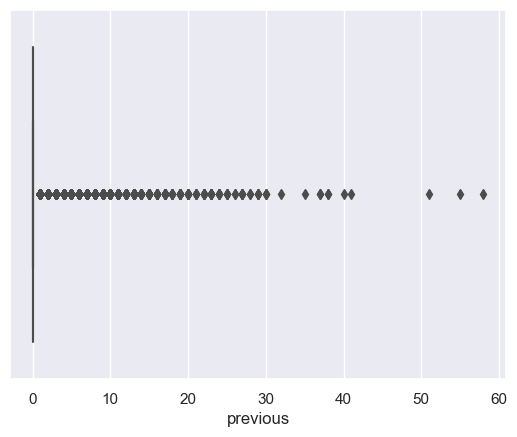

In [31]:
def boxplot(col):
    sns.boxplot(df[col])
    
    plt.show()
    
for i in list(df.select_dtypes(exclude = 'object').columns):
    boxplot(i)

In [32]:
# Applying Log transformation on balance,duration and pdays.

In [33]:
df['balance'] = np.log(df['balance'] - df['balance'].min() + 1)
df['duration'] = np.log(df['duration'] - df['duration'].min() + 1)
df['pdays'] = np.log(df['pdays'] - df['pdays'].min() + 1)

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,9.226509,yes,no,unknown,5,may,5.568345,1,0.0,0,unknown,no
1,44,technician,single,secondary,no,8.993303,yes,no,unknown,5,may,5.023881,1,0.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,8.989943,yes,yes,unknown,5,may,4.343805,1,0.0,0,unknown,no
3,47,blue-collar,married,unknown,no,9.161780,yes,no,unknown,5,may,4.532599,1,0.0,0,unknown,no
4,33,unknown,single,unknown,no,8.989818,no,no,unknown,5,may,5.293305,1,0.0,0,unknown,no


# Encoding

In [35]:
cat_cols = df.select_dtypes(include = 'object')

In [36]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [37]:
numeric_cols = df.select_dtypes(exclude = 'object')

In [38]:
numeric_cols

,age,balance,day,duration,campaign,pdays,previous
0,58,9.226509,5,5.568345,1,0.000000,0
1,44,8.993303,5,5.023881,1,0.000000,0
2,33,8.989943,5,4.343805,1,0.000000,0
3,47,9.161780,5,4.532599,1,0.000000,0
4,33,8.989818,5,5.293305,1,0.000000,0
...,...,...,...,...,...,...,...
45206,51,9.087608,17,6.885510,3,0.000000,0
45207,71,9.184920,17,6.124683,2,0.000000,0
45208,72,9.527703,17,7.028201,5,5.220356,3
45209,57,9.069698,17,6.232448,4,0.000000,0


In [39]:
cat_cols_encoded = pd.get_dummies(cat_cols,drop_first = True)

In [40]:
cat_cols_encoded

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
cat_cols_encoded = cat_cols_encoded.rename(columns = {'y_yes':'y'})

In [42]:
cat_cols_encoded

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
df_new = df.copy()

In [44]:
df_new = df_new.drop(columns = cat_cols, axis = 1)

In [45]:
df_new = pd.concat([df_new,cat_cols_encoded],axis = 1)

In [46]:
df_new

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,9.226509,5,5.568345,1,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,8.993303,5,5.023881,1,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,8.989943,5,4.343805,1,0.000000,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,9.161780,5,4.532599,1,0.000000,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,8.989818,5,5.293305,1,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.087608,17,6.885510,3,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,9.184920,17,6.124683,2,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,9.527703,17,7.028201,5,5.220356,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,9.069698,17,6.232448,4,0.000000,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
df_new.shape

(45210, 43)

In [48]:
df_new['y'].value_counts()

0    39921
1     5289
Name: y, dtype: int64

# Feature Selection with Chi2 and Anova 

In [49]:
from scipy.stats import chi2_contingency, f_oneway

In [50]:
chi2_p_values = {}
for col in cat_cols_encoded:
    contingency_table = pd.crosstab(df_new[col], df_new['y'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_p_values[col] = p

In [51]:
print("Chi-squared p-values:")
for col, p_value in chi2_p_values.items():
    print(f"{col}: {p_value}")

Chi-squared p-values:
job_blue-collar: 6.56196022076243e-53
job_entrepreneur: 3.4726417414025076e-05
job_housemaid: 0.0014409190244469349
job_management: 2.847634410407319e-12
job_retired: 1.8713606167981938e-63
job_self-employed: 0.887376068181484
job_services: 3.638469594678849e-09
job_student: 1.0066872546791062e-59
job_technician: 0.058968471937863295
job_unemployed: 1.7753612370631807e-05
job_unknown: 1.0
marital_married: 1.7101406101756246e-37
marital_single: 1.7905685568697753e-41
education_secondary: 1.1254504586286971e-14
education_tertiary: 3.0420876055496044e-45
education_unknown: 0.011549956864948396
default_yes: 2.451601106314752e-06
housing_yes: 3.0561190942330133e-192
loan_yes: 1.6496460928175662e-47
contact_telephone: 0.003121366493916591
contact_unknown: 8.970167611656364e-226
month_aug: 0.0727288047754763
month_dec: 9.401958219531606e-57
month_feb: 3.771402484588979e-16
month_jan: 0.06792254390281321
month_jul: 3.080745621716258e-13
month_jun: 0.0003836406147897842
mo

In [52]:
significance_level = 0.05
cat_columns_insignificant = [col for col, p_value in chi2_p_values.items() if p_value > significance_level]
cat_columns_insignificant

['job_self-employed',
 'job_technician',
 'job_unknown',
 'month_aug',
 'month_jan']

In [53]:
anova_p_values = {}
for col in numeric_cols:
    group1 = df[df_new['y'] == 0][col]
    group2 = df[df_new['y'] == 1][col]
    f_statistic, p = f_oneway(group1, group2)
    anova_p_values[col] = p

In [54]:
print("\nANOVA p-values:")
for col, p_value in anova_p_values.items():
    print(f"{col}: {p_value}")


ANOVA p-values:
age: 8.835492115386517e-08
balance: 6.528695959979244e-51
day: 1.6237898565117858e-09
duration: 0.0
campaign: 1.0078465104959343e-54
pdays: 2.191211567943575e-239
previous: 5.3690003296493675e-130


In [55]:
significance_level = 0.05
num_columns_insignificant = [col for col, p_value in anova_p_values.items() if p_value > significance_level]
num_columns_insignificant

[]

We can drop the insignificant variables.

In [56]:
df_new = df_new.drop(['job_self-employed',
 'job_technician',
 'job_unknown',
 'month_aug',
 'month_jan'
 ],axis = 1)

In [57]:
df_new.shape

(45210, 38)

# Splitting the data

In [58]:
x = df_new.drop('y', axis = 1)
y = df_new[['y']]

In [59]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,9.226509,5,5.568345,1,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,8.993303,5,5.023881,1,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,8.989943,5,4.343805,1,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,9.161780,5,4.532599,1,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,8.989818,5,5.293305,1,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [60]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


# Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [62]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns = x.columns)

In [63]:
x_scaled.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606945,0.506422,-1.298538,0.430181,-0.56935,-0.467285,-0.300986,-0.523747,-0.184417,-0.167932,...,-0.424212,-0.366011,-0.103263,1.51135,-0.310267,-0.12882,-0.113899,-0.205916,-0.18595,0.472491
1,0.288524,-0.588573,-1.298538,-0.160462,-0.56935,-0.467285,-0.300986,-0.523747,-0.184417,-0.167932,...,-0.424212,-0.366011,-0.103263,1.51135,-0.310267,-0.12882,-0.113899,-0.205916,-0.18595,0.472491
2,-0.747378,-0.604350,-1.298538,-0.898217,-0.56935,-0.467285,-0.300986,-0.523747,5.422499,-0.167932,...,-0.424212,-0.366011,-0.103263,1.51135,-0.310267,-0.12882,-0.113899,-0.205916,-0.18595,0.472491
3,0.571043,0.202494,-1.298538,-0.693411,-0.56935,-0.467285,-0.300986,1.909319,-0.184417,-0.167932,...,-0.424212,-0.366011,-0.103263,1.51135,-0.310267,-0.12882,-0.113899,-0.205916,-0.18595,0.472491
4,-0.747378,-0.604936,-1.298538,0.131814,-0.56935,-0.467285,-0.300986,-0.523747,-0.184417,-0.167932,...,-0.424212,-0.366011,-0.103263,1.51135,-0.310267,-0.12882,-0.113899,-0.205916,-0.18595,0.472491


# Model Building

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=101)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((36168, 37), (9042, 37), (36168, 1), (9042, 1))

We have an imbalanced dataset hence we can use SMOTE to balance the dataset

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smote = SMOTE()

In [69]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [70]:
x_train_smote.shape, y_train_smote.shape

((63840, 37), (63840, 1))

In [71]:
y_train_smote.value_counts()

y
0    31920
1    31920
dtype: int64

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [73]:
# Logistic Regression

In [74]:
lr = LogisticRegression()
lr.fit(x_train_smote,y_train_smote)
y_train_pred_lr = lr.predict(x_train_smote)
y_test_pred_lr = lr.predict(x_test)
lr_train_accuracy = accuracy_score(y_train_smote,y_train_pred_lr)
lr_test_accuracy = accuracy_score(y_test,y_test_pred_lr)
lr_train_report = classification_report(y_train_smote,y_train_pred_lr)
lr_test_report = classification_report(y_test,y_test_pred_lr)
y_pred_proba_train_lr = lr.predict_proba(x_train_smote)
y_pred_proba_test_lr = lr.predict_proba(x_test)
auc_score_train_lr = roc_auc_score(y_train_smote,y_pred_proba_train_lr[:,1])
auc_score_test_lr = roc_auc_score(y_test,y_pred_proba_test_lr[:,1] )

In [75]:
print('Training accuracy : ',lr_train_accuracy)
print('Testing accuracy : ',lr_test_accuracy)

Training accuracy :  0.8460996240601504
Testing accuracy :  0.8178500331785004


In [76]:
print('Testing report : ','\n', lr_test_report)

Testing report :  
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      8001
           1       0.37      0.81      0.51      1041

    accuracy                           0.82      9042
   macro avg       0.67      0.82      0.70      9042
weighted avg       0.90      0.82      0.84      9042



In [77]:
print (confusion_matrix(y_test,y_test_pred_lr))

[[6547 1454]
 [ 193  848]]


In [78]:
print(auc_score_train_lr)
print(auc_score_test_lr)

0.917775762832834
0.9003885321251269


In [79]:
# Decision Tree

In [80]:
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)
dt.fit(x_train_smote,y_train_smote)
y_train_pred_dt = dt.predict(x_train_smote)
y_test_pred_dt = dt.predict(x_test)
dt_train_accuracy = accuracy_score(y_train_smote,y_train_pred_dt)
dt_test_accuracy = accuracy_score(y_test,y_test_pred_dt)
dt_train_report = classification_report(y_train_smote,y_train_pred_dt)
dt_test_report = classification_report(y_test,y_test_pred_dt)
y_pred_proba_train_dt = dt.predict_proba(x_train_smote)
y_pred_proba_test_dt = dt.predict_proba(x_test)
auc_score_train_dt = roc_auc_score(y_train_smote,y_pred_proba_train_dt[:,1])
auc_score_test_dt = roc_auc_score(y_test,y_pred_proba_test_dt[:,1])

In [81]:
print('Training accuracy : ',dt_train_accuracy)
print('Testing accuracy : ',dt_test_accuracy)

Training accuracy :  0.844125939849624
Testing accuracy :  0.8056845830568459


In [82]:
print(dt_test_report)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8001
           1       0.35      0.78      0.48      1041

    accuracy                           0.81      9042
   macro avg       0.66      0.79      0.68      9042
weighted avg       0.89      0.81      0.83      9042



In [83]:
print (confusion_matrix(y_test,y_test_pred_dt))

[[6472 1529]
 [ 228  813]]


In [84]:
print(auc_score_train_dt)
print(auc_score_test_dt)

0.9020278403951608
0.8558234375362063


In [85]:
# Random Forest

In [86]:
rf = RandomForestClassifier(n_estimators = 100 ,max_depth = 5,oob_score = True)
rf.fit(x_train_smote,y_train_smote)
y_train_pred_rf = rf.predict(x_train_smote)
y_test_pred_rf = rf.predict(x_test)
rf_train_accuracy = accuracy_score(y_train_smote,y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test,y_test_pred_rf)
rf_train_report = classification_report(y_train_smote,y_train_pred_rf)
rf_test_report = classification_report(y_test,y_test_pred_rf)
y_pred_proba_train_rf = rf.predict_proba(x_train_smote)
y_pred_proba_test_rf = rf.predict_proba(x_test)
auc_score_train_rf = roc_auc_score(y_train_smote,y_pred_proba_train_rf[:,1])
auc_score_test_rf = roc_auc_score(y_test,y_pred_proba_test_rf[:,1])

In [87]:
print('Training accuracy : ',rf_train_accuracy)
print('Testing accuracy : ',rf_test_accuracy)

Training accuracy :  0.8695958646616542
Testing accuracy :  0.8220526432205264


In [88]:
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8001
           1       0.37      0.78      0.50      1041

    accuracy                           0.82      9042
   macro avg       0.67      0.80      0.70      9042
weighted avg       0.90      0.82      0.85      9042



In [89]:
print(confusion_matrix(y_test,y_test_pred_rf))

[[6626 1375]
 [ 234  807]]


In [90]:
print(auc_score_train_rf)
print(auc_score_test_rf)

0.9368262305787967
0.8866928377468666


# Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
# Logistic Regression

In [93]:
training_accuracy = cross_val_score(lr, x_train_smote, y_train_smote, cv=10,scoring = 'roc_auc')
test_accuracy = cross_val_score(lr, x_test, y_test, cv=10,scoring = 'roc_auc')
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9174319139012945
*******************************************************************************************************************
Test Accuracy after CV : 0.8973503023349935


In [94]:
# Decision Tree

In [95]:
training_accuracy = cross_val_score(dt, x_train_smote, y_train_smote, cv=10,scoring = 'roc_auc')
test_accuracy = cross_val_score(dt, x_test, y_test, cv=10,scoring = 'roc_auc')
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.8998048015951532
*******************************************************************************************************************
Test Accuracy after CV : 0.8242855316928702


In [96]:
# Random Forest

In [97]:
training_accuracy = cross_val_score(rf, x_train_smote, y_train_smote, cv=10,scoring = 'roc_auc')
test_accuracy = cross_val_score(rf, x_test, y_test, cv=10,scoring = 'roc_auc')
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9354745681167204
*******************************************************************************************************************
Test Accuracy after CV : 0.899745104998388


# ROC - AUC Curve

In [98]:
# Plotting ROC_AUC Curve for LR Model

In [99]:
y_pred_proba = lr.predict_proba(x_test)

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

ROC-AUC 0.9003885321251269


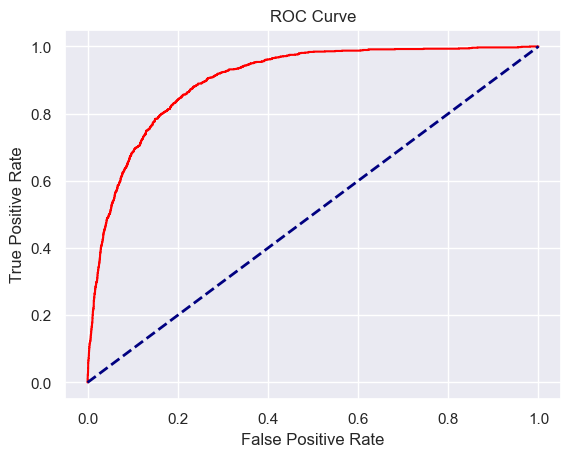

In [101]:
plt.plot(fpr, tpr, color = 'red')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


print('ROC-AUC', roc_auc)

plt.show()

In [124]:
lr.fit(x_scaled,y)
importances = lr.coef_[0]
for feature, importance in zip(x,importances):
    print(feature,importance)

age -0.009666202346063595
balance 0.07538589847535615
day 0.06559701083662052
duration 1.7521536778132523
campaign -0.2214636549023667
pdays -0.14853209461575978
previous 0.04720446248311445
job_blue-collar -0.0682349992018503
job_entrepreneur -0.042735392733346485
job_housemaid -0.05173710320228564
job_management -0.008301758917338477
job_retired 0.07611349413919086
job_services -0.029407482476716526
job_student 0.0857248015647006
job_unemployed -0.01970422104941176
marital_married -0.10102186089291647
marital_single 0.027373308578664934
education_secondary 0.08570100202903694
education_tertiary 0.15917809234205524
education_unknown 0.04363388709583071
default_yes -0.008845240063282972
housing_yes -0.2692196552081992
loan_yes -0.14068086958444725
contact_telephone -0.0268053969363901
contact_unknown -0.6780747681021979
month_dec 0.08100578161497325
month_feb 0.09469603433373029
month_jul -0.1086628026133242
month_jun 0.30744399546362927
month_mar 0.24278476589879766
month_may 0.026744

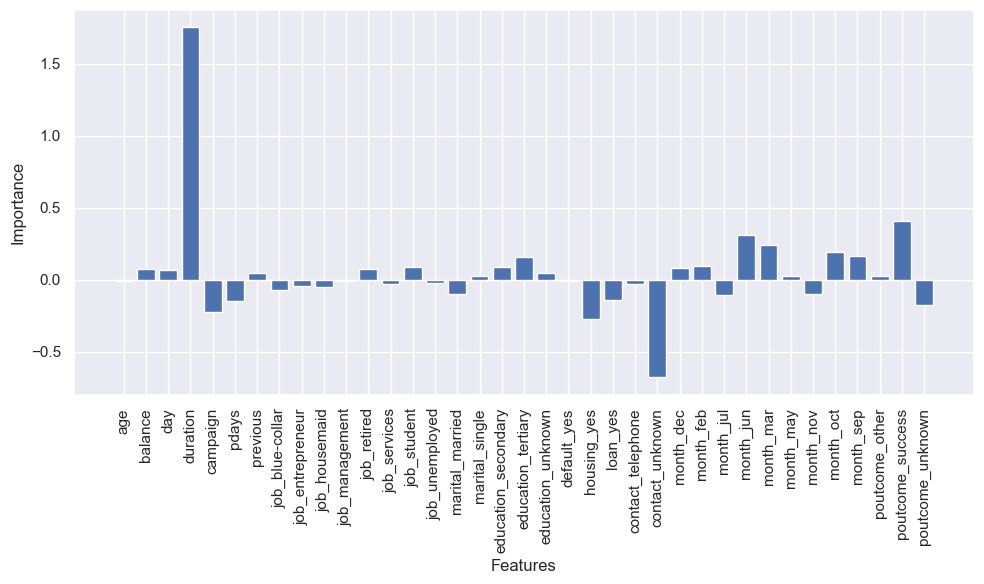

In [125]:
plt.figure(figsize=(10, 6))
plt.bar([x for x in range(len(importances))], importances)
plt.xticks([x for x in range(len(importances))], x, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

The variable duration contributes maximum to the model. The least contribution is by contact_unknown.

Overall Logistic Regression seems to give a good result.
1. The model accuracy is at 82% and the ROC AUC score is at 90%. Post Cross Validation the ROC AUC Score is at 89%.
2. There is no variance between the train and the test.
3. The Recall value is at 82% for the positive class, which means that the True Positives are captured well by model even though the precision is less. 
4. Since the data is imbalanced there is a tradeoff between precision at 37% and recall at 82%, a lower precision and a higher recall value means that our model is able to identify the actual churners 82% of times.